https://geopandas.org/

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
!pip install geopandas
!pip install descartes
import geopandas as gpd

In [40]:
df_map = gpd.read_file("static/London_Borough_Excluding_MHW.shp")
df_map.head(5)

NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F     None   
1               Croydon  E09000008   8649.441       0.000         F     None   
2               Bromley  E09000006  15013.487       0.000         F     None   
3              Hounslow  E09000018   5658.541      60.755         F     None   
4                Ealing  E09000009   5554.428       0.000         F     None   

  SUB_2006                                           geometry  
0     None  POLYGON ((516401.600 160201.800, 516407.300 16...  
1     None  POLYGON ((535009.200 159504.700, 535005.500 15...  
2     None  POLYGON ((540373.600 157530.400, 540361.200 15...  
3     None  POLYGON ((521975.800 178100.000, 521967.700 17...  
4     None  POLYGON ((510253.500 182881.600, 510249.900 18...

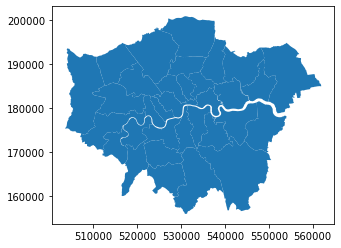

In [41]:
%matplotlib inline
map_df.plot()

In [44]:
df_score = pd.read_csv("static/london-borough-profile.csv")[[
    'borough', 
    'Happiness_score_2011-14_(out_of_10)',
    'Anxiety_score_2011-14_(out_of_10)',
    'Mortality_rate_from_causes_considered_preventable_2012/14'
]].rename(columns = {
    'Happiness_score_2011-14_(out_of_10)' : 'happiness',
    'Anxiety_score_2011-14_(out_of_10)' : 'anxiety',
    'Mortality_rate_from_causes_considered_preventable_2012/14': 'mortality'
})
df_score

borough  happiness  anxiety  mortality
0           City of London        6.0      5.6        129
1     Barking and Dagenham        7.1      3.1        228
2                   Barnet        7.4      2.8        134
3                   Bexley        7.2      3.3        164
4                    Brent        7.2      2.9        169
5                  Bromley        7.4      3.3        148
6                   Camden        7.1      3.6        164
7                  Croydon        7.2      3.3        178
8                   Ealing        7.3      3.6        164
9                  Enfield        7.3      2.6        152
10               Greenwich        7.2      3.4        193
11                 Hackney        7.0      3.8        211
12  Hammersmith and Fulham        7.2      3.1        187
13                Haringey        7.2      3.2        183
14                  Harrow        7.3      2.7        134
15                Havering        7.2      3.3        159
16              Hillingdon        7.3      3.5        170
17                Hounslow        7.4      3.4        166
18               Islington        7.1      3.7        203
19  Kensington and Chelsea        7.6      3.1        136
20    Kingston upon Thames        7.4      3.3        141
21                 Lambeth        7.2      3.5        205
22                Lewisham        7.3      3.4        191
23                  Merton        7.1      3.6        162
24                  Newham        7.2      3.4        193
25               Redbridge        7.3      3.2        142
26    Richmond upon Thames        7.3      3.2        137
27               Southwark        7.3      3.4        207
28                  Sutton        7.3      3.2        163
29           Tower Hamlets        7.2      3.3        239
30          Waltham Forest        7.1      3.1        185
31              Wandsworth        7.4      3.6        177
32             Westminster        7.1      3.4        162

### Varanta přes join

In [56]:
join = df_score.set_index('borough').join(df_map.set_index('NAME'))
join

happiness  anxiety  mortality   GSS_CODE   HECTARES  \
borough                                                                       
City of London                6.0      5.6        129  E09000001    314.942   
Barking and Dagenham          7.1      3.1        228  E09000002   3779.934   
Barnet                        7.4      2.8        134  E09000003   8674.837   
Bexley                        7.2      3.3        164  E09000004   6428.649   
Brent                         7.2      2.9        169  E09000005   4323.270   
Bromley                       7.4      3.3        148  E09000006  15013.487   
Camden                        7.1      3.6        164  E09000007   2178.932   
Croydon                       7.2      3.3        178  E09000008   8649.441   
Ealing                        7.3      3.6        164  E09000009   5554.428   
Enfield                       7.3      2.6        152  E09000010   8220.025   
Greenwich                     7.2      3.4        193  E09000011   5044.190   
Hackney                       7.0      3.8        211  E09000012   1904.902   
Hammersmith and Fulham        7.2      3.1        187  E09000013   1715.409   
Haringey                      7.2      3.2        183  E09000014   2959.837   
Harrow                        7.3      2.7        134  E09000015   5046.330   
Havering                      7.2      3.3        159  E09000016  11445.735   
Hillingdon                    7.3      3.5        170  E09000017  11570.063   
Hounslow                      7.4      3.4        166  E09000018   5658.541   
Islington                     7.1      3.7        203  E09000019   1485.664   
Kensington and Chelsea        7.6      3.1        136  E09000020   1238.379   
Kingston upon Thames          7.4      3.3        141  E09000021   3726.117   
Lambeth                       7.2      3.5        205  E09000022   2724.940   
Lewisham                      7.3      3.4        191  E09000023   3531.706   
Merton                        7.1      3.6        162  E09000024   3762.466   
Newham                        7.2      3.4        193  E09000025   3857.806   
Redbridge                     7.3      3.2        142  E09000026   5644.225   
Richmond upon Thames          7.3      3.2        137  E09000027   5876.111   
Southwark                     7.3      3.4        207  E09000028   2991.340   
Sutton                        7.3      3.2        163  E09000029   4384.698   
Tower Hamlets                 7.2      3.3        239  E09000030   2157.501   
Waltham Forest                7.1      3.1        185  E09000031   3880.793   
Wandsworth                    7.4      3.6        177  E09000032   3522.022   
Westminster                   7.1      3.4        162  E09000033   2203.005   

                        NONLD_AREA ONS_INNER SUB_2009 SUB_2006  \
borough                                                          
City of London              24.546         T     None     None   
Barking and Dagenham       169.150         F     None     None   
Barnet                       0.000         F     None     None   
Bexley                     370.619         F     None     None   
Brent                        0.000         F     None     None   
Bromley                      0.000         F     None     None   
Camden                       0.000         T     None     None   
Croydon                      0.000         F     None     None   
Ealing                       0.000         F     None     None   
Enfield                      0.000         F     None     None   
Greenwich                  310.785         F     None     None   
Hackney                      0.000         T     None     None   
Hammersmith and Fulham      75.648         T     None     None   
Haringey                     0.000         T     None     None   
Harrow                       0.000         F     None     None   
Havering                   210.763         F     None     None   
Hillingdon                   0.000         F     None     None   
Houn

### Spojení přes Merge

In [64]:
pd.merge(
    left = df_map,
    right= df_score,
    left_on='NAME',
    right_on='borough'
)

NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  \
0     Kingston upon Thames  E09000021   3726.117       0.000         F   
1                  Croydon  E09000008   8649.441       0.000         F   
2                  Bromley  E09000006  15013.487       0.000         F   
3                 Hounslow  E09000018   5658.541      60.755         F   
4                   Ealing  E09000009   5554.428       0.000         F   
5                 Havering  E09000016  11445.735     210.763         F   
6               Hillingdon  E09000017  11570.063       0.000         F   
7                   Harrow  E09000015   5046.330       0.000         F   
8                    Brent  E09000005   4323.270       0.000         F   
9                   Barnet  E09000003   8674.837       0.000         F   
10                 Lambeth  E09000022   2724.940      43.927         T   
11               Southwark  E09000028   2991.340     105.139         T   
12                Lewisham  E09000023   3531.706      16.795         T   
13               Greenwich  E09000011   5044.190     310.785         F   
14                  Bexley  E09000004   6428.649     370.619         F   
15                 Enfield  E09000010   8220.025       0.000         F   
16          Waltham Forest  E09000031   3880.793       0.000         F   
17               Redbridge  E09000026   5644.225       2.300         F   
18                  Sutton  E09000029   4384.698       0.000         F   
19    Richmond upon Thames  E09000027   5876.111     135.443         F   
20                  Merton  E09000024   3762.466       0.000         F   
21              Wandsworth  E09000032   3522.022      95.600         T   
22  Hammersmith and Fulham  E09000013   1715.409      75.648         T   
23  Kensington and Chelsea  E09000020   1238.379      25.994         T   
24             Westminster  E09000033   2203.005      54.308         T   
25                  Camden  E09000007   2178.932       0.000         T   
26           Tower Hamlets  E09000030   2157.501     179.707         T   
27               Islington  E09000019   1485.664       0.000         T   
28                 Hackney  E09000012   1904.902       0.000         T   
29                Haringey  E09000014   2959.837       0.000         T   
30                  Newham  E09000025   3857.806     237.637         T   
31    Barking and Dagenham  E09000002   3779.934     169.150         F   
32          City of London  E09000001    314.942      24.546         T   

   SUB_2009 SUB_2006                                           geometry  \
0      None     None  POLYGON ((516401.600 160201.800, 516407.300 16...   
1      None     None  POLYGON ((535009.200 159504.700, 535005.500 15...   
2      None     None  POLYGON ((540373.600 157530.400, 540361.200 15...   
3      None     None  POLYGON ((521975.800 178100.000, 521967.700 17...   
4      None     None  POLYGON ((510253.500 182881.600, 510249.900 18...   
5      None     None  POLYGON ((549893.900 181459.800, 549894.600 18...   
6      None     None  POLYGON ((510599.800 191689.500, 510615.200 19...   
7      None     None  POLYGON ((510599.800 191689.500, 510660.000 19...   
8      None     None  POLYGON ((525201.000 182512.600, 525181.500 18...   
9      None     None  POLYGON ((524579.900 198355.200, 524594.300 19...   
10     None     None  POLYGON ((530046.800 177893.400, 530048.400 17...   
11     None     None  POLYGON ((531335.600 180529.500, 531337.700 18...   
12     None     None  POLYGON ((536691.000 178958.600, 536691.900 17...   
13     None     None  MULTIPOLYGON (((537238.700 178137.700, 537242....   
14     None     None  POLYGON ((547226.200 181299.300, 547320.900 18...   
15     None     None  POLYGON ((531023.500 200933.600, 531039.900 20...   
16     None     None  POLYGON ((539923.100 191863.100, 539928.100 19...   
17     None     None  POLYGON ((543595.500 184832.800, 543577.100 18...   
18     None     None  POLYGON ((528552.300 159658.100, 528399.700 15...   
19   

In [49]:
A = pd.DataFrame([["A", "1"],["B", "2"]])
B = pd.DataFrame([["B", "3"],["C", "4"]])
A, B

(   0  1
 0  A  1
 1  B  2,
    0  1
 0  B  3
 1  C  4)

In [52]:
pd.merge(
    left=A,
    right=B,
    how = 'inner',
    left_on=0,
    right_on=0,
)

0 1_x 1_y
0  B   2   3

In [53]:
pd.merge(
    left=A,
    right=B,
    how = 'left',
    left_on=0,
    right_on=0,
)

0 1_x  1_y
0  A   1  NaN
1  B   2    3

In [54]:
pd.merge(
    left=A,
    right=B,
    how = 'right',
    left_on=0,
    right_on=0,
)

0  1_x 1_y
0  B    2   3
1  C  NaN   4

In [55]:
pd.merge(
    left=A,
    right=B,
    how = 'outer',
    left_on=0,
    right_on=0,
)

0  1_x  1_y
0  A    1  NaN
1  B    2    3
2  C  NaN    4

## Vykreslení

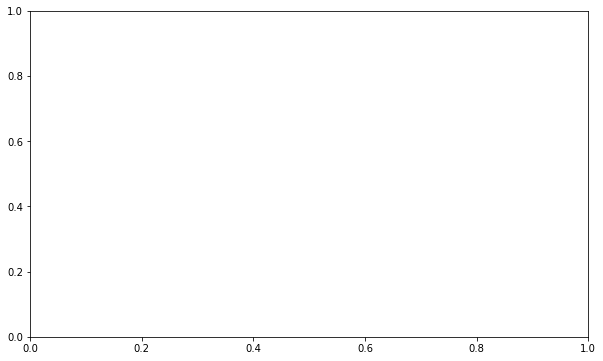

In [65]:
fig, ax = plt.subplots(1, figsize=(10,6))

In [71]:
join['HECTARES'].plot(ax=ax, cmap='Blues', linewidth=0.8)

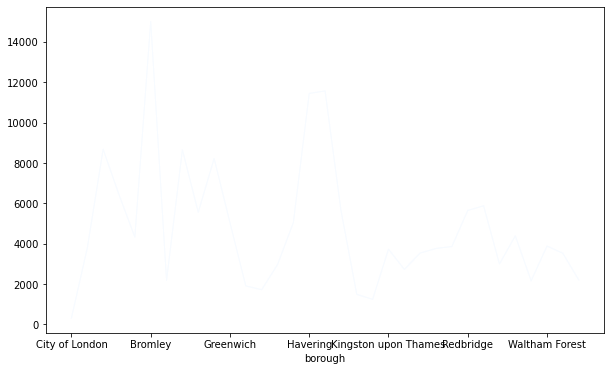

In [72]:
fig